In [115]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as si
import numpy.linalg as npla

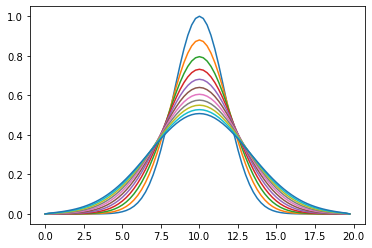

In [108]:
#this is my 2nd attempt at crank with the 1D heat equation

#variables
L=20
t0=0
tmax=2
x0=0
xmax=L
isteps=4*L
nsteps=10
dt=0.001
dx=xmax/isteps
k=L**2
r=(k*dt)/(2*(dx)**2)
sigma=L/12
x=np.zeros(isteps+1)

for i in range(isteps):
    xi=x0+(i+1)*dx
    x[i+1]=xi
    
T=np.zeros(isteps)

for i in range(1,isteps):#gives first array of T vs x
    xi=x0+(i)*dx
    Ti=np.exp((-1/2)*((xi-(L/2))**2)/(sigma)**2)
    T[i]=Ti

#make array of arrays of T
Tn=[]
Tn.append(T)

def CrankNicolson(T):#NEED TO FINISH WRITING THIS put in the inverse matrix
    a=-r
    b=(1+2*r)
    c=-r#these are also correct for the LHS
    RHS=np.zeros(isteps)
    for i in range(1,isteps-1):
        RHS[i]=r*T[i+1]+(1-2*r)*T[i]+r*T[i-1]#this is correct
    RHS[0]=r*T[1]
    RHS[isteps-1]=r*T[isteps-2]
    D=np.matrix(RHS).T#made matrix and made it vertical
    def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
        return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
    A=[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
    d=tridiag(A, B, C)
    I=npla.inv(d)#inverse matrix... this might be the issue..?
    T1=I*D
    T1=np.array(T1.T)[0]
    T1[0]=0
    T1[-1]=0
    return T1

plt.plot(x[0:isteps],T)

for n in range(nsteps):#run crank for all t and plot for each
    T=CrankNicolson(T)
    Tn.append(T)
    plt.plot(x[0:isteps],T)


plt.show()

In [109]:
#this is me figuring out how to make a matrix...
nsteps=5
r=nsteps
isteps=10
A=np.zeros((nsteps,nsteps))
A[0,1]=2

print(A)

a=-r
b=(1+2*r)
c=-r
e=np.zeros((isteps-1,isteps-1))
e[7:9]=[2]
e[0:7]=[0]
e=np.matrix(e).T
e[8:9]=[2]
e[1:8]=[0]
print(e)
def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
       return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
A=[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
d=tridiag(A, B, C)
d[0][isteps-1]=r
d[0][isteps-2]=r
d[isteps-1][0]=r
d[isteps-1][1]=r
print(d)


[[0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2.]]
[[11 -5  0  0  0  0  0  0  5  5]
 [-5 11 -5  0  0  0  0  0  0  0]
 [ 0 -5 11 -5  0  0  0  0  0  0]
 [ 0  0 -5 11 -5  0  0  0  0  0]
 [ 0  0  0 -5 11 -5  0  0  0  0]
 [ 0  0  0  0 -5 11 -5  0  0  0]
 [ 0  0  0  0  0 -5 11 -5  0  0]
 [ 0  0  0  0  0  0 -5 11 -5  0]
 [ 0  0  0  0  0  0  0 -5 11 -5]
 [ 5  5  0  0  0  0  0  0 -5 11]]


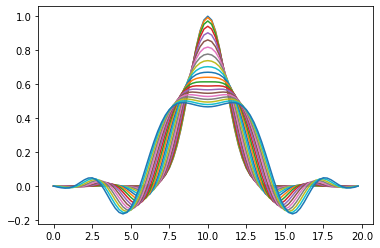

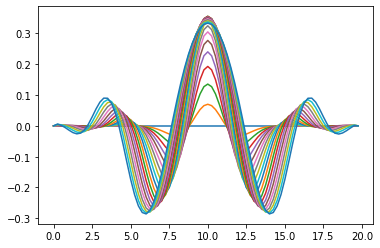

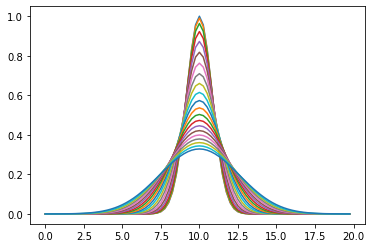

In [110]:
#this is my 2nd attempt at crank with the 1D heat equation

#variables
L=20
t0=0
tmax=2
x0=0
xmax=L
isteps=4*L
nsteps=20
dt=0.2
dx=xmax/isteps
k=1j
r=(dt)/(4*k*(dx)**2)
sigma=L/12
x=np.zeros(isteps+1)

for i in range(isteps):
    xi=x0+(i+1)*dx
    x[i+1]=xi
    
T=np.zeros(isteps,np.complex)

for i in range(1,isteps):#gives first array of T vs x
    xi=x0+(i)*dx
    Ti=np.exp((-1)*((xi-(L/2))**2)/(sigma)**2)
    T[i]=Ti


#make array of arrays of T
Tn=[]
Tn.append(T)


def CrankNicolson(T):#NEED TO FINISH WRITING THIS put in the inverse matrix
    a=-r
    b=(1+2*r)
    c=-r
    RHS=np.zeros(isteps,np.complex)
    for i in range(1,isteps-1):
        RHS[i]=r*T[i+1]+(1-2*r)*T[i]+r*T[i-1]
    RHS[0]=r*T[1]
    RHS[isteps-1]=r*T[isteps-2]
    D=np.matrix(RHS).T#made matrix for the RHS
    def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
        return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
    A=[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
    d=tridiag(A, B, C)
    d[0][isteps-1]=a
    d[0][isteps-2]=c
    d[isteps-1][0]=a
    d[isteps-1][1]=c
    I=npla.inv(d)#inverse matrix... this might be the issue..?
    T1=I*D
    T1=np.array(T1.T)[0]
    T1[0]=0
    T1[-1]=0
    return T1

plt.plot(x[0:isteps],np.real(T))# plots initial condition

for n in range(nsteps):#run crank for all t and plot for each plots real parts
    T=CrankNicolson(T)
    Tn.append(T)
    plt.plot(x[0:isteps],np.real(T))
    

plt.show()

for T in Tn:#Plots imaginary parts
    plt.plot(x[0:isteps],np.imag(T))

plt.show()

for T in Tn:#plots overall average
    plt.plot(x[0:isteps],np.abs(T)**2)
    
plt.show()

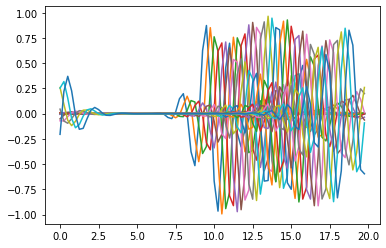

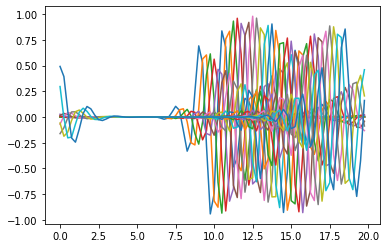

8.355427582103335
8.355427582103339
8.355427582103339
8.35542758210334
8.35542758210334
8.355427582103342
8.355427582103342
8.355427582103344
8.355427582103346
8.355427582103346
8.355427582103346
8.355427582103346
8.355427582103346
8.355427582103347
8.35542758210335
8.35542758210335
8.35542758210335
8.35542758210335
8.35542758210335
8.355427582103351
8.355427582103353


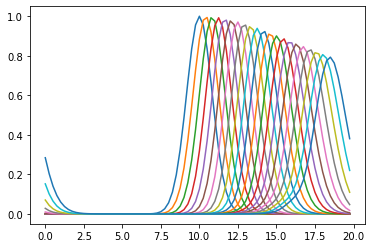

In [111]:
#attempt with periodic boundary conditions

#variables
L=20
t0=0
tmax=2
x0=0
xmax=L
isteps=4*L
nsteps=20
dt=0.2
dx=xmax/isteps
k=1j
r=(dt)/(4*k*(dx)**2)
sigma=L/12
x=np.zeros(isteps+1)

for i in range(isteps):
    xi=x0+(i+1)*dx
    x[i+1]=xi
    
T=np.zeros(isteps,np.complex)

for i in range(1,isteps):#gives first array of T vs x
    xi=x0+(i)*dx
    Ti=np.exp(-4*k*xi+(-1)*((xi-(L/2))**2)/(sigma)**2)
    T[i]=Ti


#make array of arrays of T
Tn=[]
Tn.append(T)


def CrankNicolson(T):#NEED TO FINISH WRITING THIS put in the inverse matrix
    a=-r
    b=(1+2*r)
    c=-r
    RHS=np.zeros(isteps,np.complex)
    for i in range(1,isteps-1):
        RHS[i]=r*T[i+1]+(1-2*r)*T[i]+r*T[i-1]
    RHS[0]=r*T[1]+(1-2*r)*T[0]+r*T[-1]
    RHS[isteps-1]=r*T[0]+(1-2*r)*T[-1]+r*T[-2]
    D=np.matrix(RHS).T#made matrix for the RHS
    def tridiag(A, B, C, k1=-1, k2=0, k3=1):#tridiagonal matrix
        return np.diag(A, k1) + np.diag(B, k2) + np.diag(C, k3)
    A=[a]*(isteps-1); B = [b]*(isteps); C = [c]*(isteps-1)
    d=tridiag(A, B, C)
    d[0][isteps-1]=a#added for periodic boundary conditions, extra terms in upper right and lower left
    d[isteps-1][0]=a
    I=npla.inv(d)
    T1=I*D
    T1=np.array(T1.T)[0]
    return T1

plt.plot(x[0:isteps],np.real(T))# plots initial condition

for n in range(nsteps):#run crank for all t and plot for each plots real parts
    T=CrankNicolson(T)
    Tn.append(T)
    plt.plot(x[0:isteps],np.real(T))
    

plt.show() 

for T in Tn:#Plots imaginary parts
    plt.plot(x[0:isteps],np.imag(T))

plt.show()

for T in Tn:#plots overall average
    plt.plot(x[0:isteps],np.abs(T)**2)
    print(np.sum(np.abs(T)**2))#checking for unitarity
plt.show()



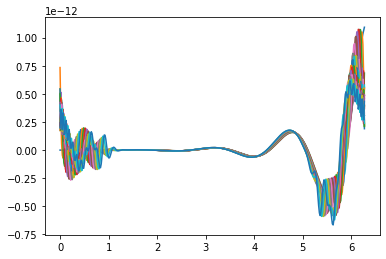

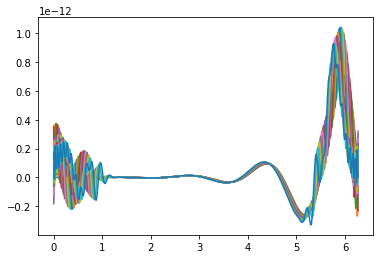

3.062501848227708e-23
3.062501848480228e-23
3.062501848901083e-23
3.0625018494902585e-23
3.0625018502477253e-23
3.062501851173458e-23
3.0625018522674203e-23
3.0625018535295715e-23
3.0625018549598566e-23
3.0625018565582186e-23
3.0625018583245964e-23
3.062501860258923e-23
3.062501862361117e-23
3.0625018646310965e-23
3.06250186706877e-23
3.0625018696740437e-23
3.062501872446816e-23
3.062501875386975e-23
3.062501878494404e-23
3.062501881768978e-23
3.062510369286599e-23


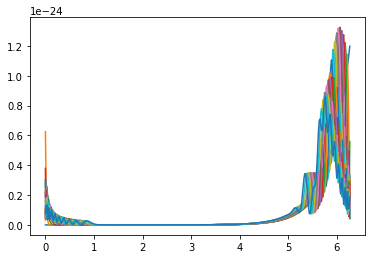

In [112]:
# trying at particle on ring system with periodic boundary cause ring and vector potential


#variables
L=100
Omeg0=1
Omeg1=np.pi
eps=0#1
ntild=1#00
t0=0
tmax=2
x0=0
xmax=2*np.pi
isteps=4*L
nsteps=20
dt=0.001
dx=xmax/isteps
k=1j
r=(dt)/(4*k*(dx)**2)
sigma=L/12
x=np.zeros(isteps+1)
drv=np.zeros(nsteps+1)
t=np.zeros(nsteps+1)

for i in range(isteps):#x array
    xi=x0+(i+1)*dx
    x[i+1]=xi

for n in range(nsteps):#t array
    tn=t0+(n+1)*dt
    t[n+1]=tn

for n in range(nsteps):#drv array, drv is drive force
    tn=t0+(n+1)*dt
    drvn=np.cos(Omeg1*tn)
    drv[n]=drvn

T=np.zeros(isteps,np.complex)

for i in range(1,isteps):#gives first array of T vs x
    xi=x0+(i)*dx
    Ti=np.exp(-4*k*xi+(-1)*((xi-(L/2))**2)/(sigma)**2)
    T[i]=Ti

#make array of arrays of T
Tn=[]
Tn.append(T)

a=np.zeros(nsteps)
b=np.zeros(nsteps)
c=np.zeros(nsteps)
a_1=np.zeros(nsteps)
b_1=np.zeros(nsteps)
c_1=np.zeros(nsteps)

def a(a,drv,x):
    a1=((1/(ntild*2*(dx)**2))-((k*eps*(Omeg0/Omeg1)*drv[n])/(dx)))
    return a1
def b(b,drv,x):
    b1=((k/(Omeg0*dt))+(1/(ntild*(dx)**2))+(eps**2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n])**2/2)-(ntild*np.cos(x[i])/2))
    return b1
def c(c,drv,x):
    c1=((1/(ntild*2*(dx)**2))+((k*eps*(Omeg0/Omeg1)*drv[n])/(dx)))
    return c1

def a_1(a_1,drv,x):
    a_11=((1/(ntild*2*(dx)**2))-((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dx)))
    return a_11
def b_1(b_1,drv,x):
    b_11=((k/(Omeg0*dt))-(1/(ntild*(dx)**2))-(eps**2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n+1])**2/2)+(ntild*np.cos(x[i])/2))
    return b_11
def c_1(c_1,drv,x):
    c_11=((1/(ntild*2*(dx)**2))+((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dx)))
    return c_11

def CrankNicolson(T,n):#NEED TO FINISH WRITING THIS put in the inverse matrix
    RHS=np.zeros(isteps,np.complex)
    for i in range(-1,isteps-1):#boudary conditions taken here?
        temp1=-a(a,drv,x)
        temp2=b(b,drv,x)
        temp3=-c(a,drv,x)
        RHS[i]=temp1*T[i+1]+temp2*T[i]+temp3*T[i-1]#boundary conditions here?
    D=np.matrix(RHS).T#made matrix for the RHS ^there is a syntax error here and i dont know why
    d=np.zeros((isteps,isteps),np.complex)
    for i in range(isteps):
        d[i,i]=b_1(b_1,drv,x)
        d[i-1,i]=c_1(c_1,drv,x)
        d[i,i-1]=a_1(a_1,drv,x)
    d[0][isteps-1]=a_1(a_1,drv,x)#added for periodic boundary conditions, extra terms in upper right and lower left
    d[isteps-1][0]=c_1(c_1,drv,x)
    d=np.matrix(d)
    I=npla.inv(d)
    T1=I*D
    T1=np.array(T1.T)[0]
    return T1

plt.plot(x[0:isteps],np.real(T))# plots initial condition

for n in range(nsteps):#run crank for all t and plot for each plots real parts                                                                  
    T=CrankNicolson(T,n)
    Tn.append(T)
    plt.plot(x[0:isteps],np.real(T))
    
plt.show() 

for T in Tn:#Plots imaginary parts
    plt.plot(x[0:isteps],np.imag(T))

plt.show()

for T in Tn:#plots overall average
    plt.plot(x[0:isteps],np.abs(T)**2)
    print(np.sum(np.abs(T)**2))#checking for unitarity
plt.show()

In [113]:
#playing with matricies to see how these work
isteps=20
d=np.zeros((isteps,isteps))
d[0,0]=2;d[0,1]=3
d[1,0]=1;d[1,1]=2;d[1,2]=3
print(d)
a=2
b=3
d=np.zeros((isteps,isteps))
for i in range(isteps):
    d[i,i]=b
    d[i,i-1]=a
    d[i-1,i]=-a
d=np.matrix(d)
print(d)

[[2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

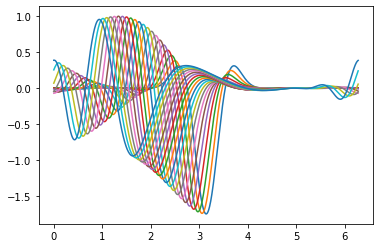

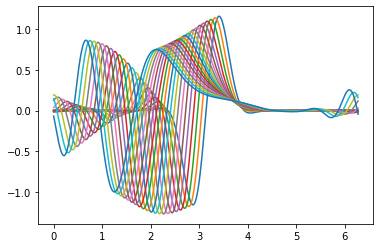

244.73134820750505
244.7313992897268
244.73155254102454
244.7318079751238
244.73216561430905
244.7326254885517
244.73318763431953
244.733852093078
244.7346189095223
244.73548812958063
244.73645979821376
244.73753395708525
244.73871064210527
244.73998988096096
244.74137169062456
244.74285607494878
244.74444302235852
244.74613250372553
244.74792447044834
244.74981885280363
244.75181555859362


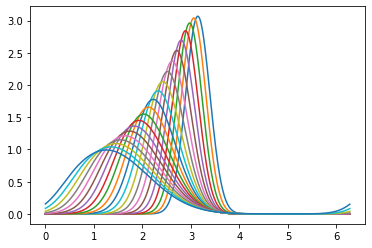

[array([[-0.22779034-3.16846636e-17j,  0.12979102+7.32971617e-17j,
        -0.06526302-5.65600265e-17j, ...,  0.581683  -3.99817136e-16j,
        -0.48223215+2.23708039e-16j,  0.35280857-3.11078341e-17j],
       [-0.22712406+1.71801969e-02j,  0.1294132 -9.85578225e-03j,
        -0.06496211+6.29892765e-03j, ...,  0.57068593-1.12318311e-01j,
        -0.47780773+6.47946605e-02j,  0.35117758-3.35028310e-02j],
       [-0.22512972+3.42535072e-02j,  0.12828207-1.96528148e-02j,
        -0.06406212+1.25405239e-02j, ...,  0.53812921-2.20325998e-01j,
        -0.46462336+1.28359766e-01j,  0.34630204-6.66772868e-02j],
       ...,
       [-0.04778462+2.17150902e-01j,  0.02633558-1.26094727e-01j,
         0.01052461+6.56149440e-02j, ..., -0.54193026+1.75205904e-01j,
         0.34497354+3.16161900e-01j, -0.0437305 -3.39043881e-01j],
       [-0.03136651+2.19519304e-01j,  0.0167437 -1.27612665e-01j,
         0.01672987+6.44507023e-02j, ..., -0.49902632+2.72520256e-01j,
         0.38201115+2.67856244e-01

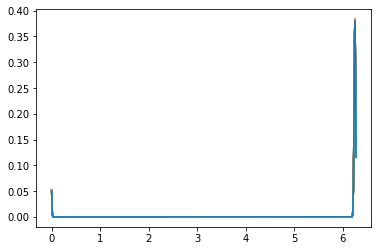

In [158]:
#Particle on ring Dimensionless


#variables
Omeg0=1
Omeg1=(np.pi)/8
eps=0.1
ntild=1#ntild = 1 is quantum, ntild>>1 is classical
dt=0.01
nsteps=20
isteps=800

t0=0
theta0=0
thetamax=2*np.pi
k=1j

#dependent variables
dtheta=thetamax/isteps
sigma=0.5

#initial arrays 
theta=np.zeros(isteps)
drv=np.zeros(nsteps+1)
t=np.zeros(nsteps+1)
   
for n in range(nsteps+1):#t,drv array, drv is drive force
    tn=t0+(n)*dt
    t[n]=tn
    drvn=np.cos(Omeg1*tn)
    drv[n]=drvn

T=np.zeros(isteps,np.complex)#wave packet array

for i in range(1,isteps):#theta,initial wave packet array T
    thetai=theta0+(i)*dtheta
    theta[i]=thetai
    Ti=(np.exp(k*np.pi))/(np.sqrt((np.sqrt(np.pi))*sigma*np.exp(-4*(k*np.pi+sigma**2))))*np.exp((-4*k*thetai)+(-1)*((thetai-np.pi)**2)/(sigma)**2)
    T[i]=Ti

#make array of arrays of T
Tn=[]
Tn.append(T)

#definitions of coeffients
def a(drv,theta):
    a1=((1/(ntild*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return a1
def b(drv,theta):
    b1=((k/(Omeg0*dt))+(1/(ntild*(dtheta)**2))+((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n])**2/2)-(ntild*np.cos(theta)/2))
    return b1
def c(drv,theta):
    c1=((1/(ntild*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return c1

def a_1(drv,theta):
    a_11=((1/(ntild*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return a_11
def b_1(drv,theta):
    b_11=((k/(Omeg0*dt))-(1/(ntild*(dtheta)**2))-((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n+1])**2/2)+(ntild*np.cos(theta)/2))
    return b_11
def c_1(drv,theta):
    c_11=((1/(ntild*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return c_11

def CrankNicolson(T,n):#Crank nicolson solver with periodic boundary conditions
    RHS=np.zeros(isteps,np.complex)#RHS
    for i in range(-1,isteps-1):
        temp1=-a(drv,theta[i])
        temp2=b(drv,theta[i])
        temp3=-c(drv,theta[i])
        RHS[i]=temp1*T[i+1]+temp2*T[i]+temp3*T[i-1]
    D=np.matrix(RHS).T#made matrix for the RHS
    d=np.zeros((isteps,isteps),np.complex)#LHS
    for i in range(-1,isteps-1):
        d[i,i]=b_1(drv,theta[i])
        d[i,i+1]=a_1(drv,theta[i])
        d[i,i-1]=c_1(drv,theta[i])
    d=np.matrix(d)#made matrix for LHS
    I=npla.inv(d)#matrix inversion using linear algebra 
    T1=I*D
    T1=np.array(T1.T)[0]#add to array of T
    return T1

plt.plot(theta,np.real(T))# plots initial condition
#Run for all t
for n in range(nsteps):#Plots real parts                                                                  
    T=CrankNicolson(T,n)
    Tn.append(T)
    plt.plot(theta,np.real(T))
    
plt.show() 

for T in Tn:#Plots imaginary parts
    plt.plot(theta,np.imag(T))

plt.show()

for T in Tn:#plots overall average
    plt.plot(theta,np.abs(T)**2)
    print(np.sum(np.abs(T)**2))#checking for unitarity
    
plt.show()

Q=[]#open array for momentum space
for n in range(nsteps):#FFT to get momentum space
    Qn=np.fft.fft(Tn)*dtheta*(1/(np.sqrt(np.pi*2*ntild)))#multiply by some function of dx
    Q.append(Qn)

print(Q)#making sure that we are getting something

for Q in Qn:#plots momentum space
    plt.plot(theta,np.abs(Q)**2)
    
plt.show()